In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

import warnings
warnings.filterwarnings('ignore')

In [2]:
walmart = pd.read_csv('walmart.csv')
target = pd.read_csv('target.csv')
amazon = pd.read_csv('amazon.csv')
costco = pd.read_csv('costco.csv')
kroger = pd.read_csv('kroger.csv')

In [3]:
df = pd.concat(map(pd.read_csv, ['walmart.csv', 'target.csv','amazon.csv','costco.csv','kroger.csv']),ignore_index = True)

In [16]:
df.tail()

,year,company,tokens_final
3710,2019,Kroger,"[company, termination, cause, treatment, award..."
3711,2019,Kroger,"[purpose, approve, company, provide, provision..."
3712,2019,Kroger,"[security, restriction, represent, book, accou..."
3713,2019,Kroger,"[case, rate, jurisdiction, approve, discretion..."
3714,2019,Kroger,"[company, extent, deems, discretion, purpose, ..."


In [5]:
df.loc[:,'tokens_final'] = df.loc[:,'tokens_final'].apply(lambda x: literal_eval(x))

In [6]:
import gensim
from gensim.utils import simple_preprocess
from gensim.test.utils import common_corpus, common_dictionary

import pprint
pp = pprint.PrettyPrinter(indent=4)

In [7]:
dictionary = gensim.corpora.Dictionary(df["tokens_final"])

dictionary.filter_extremes(no_below=1, no_above=0.5) #, keep_n=100000)

bow_corpus = [dictionary.doc2bow(word) for word in df["tokens_final"]]

lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=15, id2word=dictionary, 
                                       passes=2, workers=2, chunksize=100, random_state=1000)

In [8]:
pp.pprint(lda_model.print_topics())

[   (   0,
        '0.089*"material" + 0.053*"receive" + 0.049*"paper" + 0.046*"copy" + '
        '0.038*"report" + 0.025*"availability" + 0.024*"vacation" + '
        '0.022*"account" + 0.020*"notice" + 0.020*"access"'),
    (   1,
        '0.037*"serve" + 0.031*"chairman" + 0.024*"service" + '
        '0.023*"president" + 0.019*"chair" + 0.018*"june" + 0.016*"paul" + '
        '0.015*"vice" + 0.015*"bring" + 0.014*"business"'),
    (   2,
        '0.058*"performance" + 0.045*"officer" + 0.025*"cash" + 0.024*"bonus" '
        '+ 0.020*"base" + 0.016*"target" + 0.016*"goal" + 0.015*"program" + '
        '0.015*"group" + 0.013*"incentive"'),
    (   3,
        '0.037*"store" + 0.034*"value" + 0.031*"asset" + 0.028*"cost" + '
        '0.023*"lease" + 0.020*"estimate" + 0.014*"item" + 0.013*"liability" + '
        '0.013*"goodwill" + 0.012*"cash"'),
    (   4,
        '0.056*"benefit" + 0.047*"amount" + 0.044*"pension" + 0.032*"value" + '
        '0.024*"rate" + 0.022*"contribution" + 0.0

In [9]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)

In [10]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.201937 -0.062989       1        1  16.988605
2      0.062831  0.104905       2        1  11.314828
4      0.208672  0.008698       3        1   9.647528
6      0.207277  0.158298       4        1   9.187864
14    -0.132963 -0.010663       5        1   7.491962
13    -0.096730 -0.262101       6        1   7.249825
5     -0.226958  0.178070       7        1   7.011956
7     -0.069664 -0.052657       8        1   6.582052
3      0.152997  0.147605       9        1   4.813298
10    -0.058092 -0.092877      10        1   4.636834
11    -0.151007  0.160604      11        1   4.383288
9      0.045961 -0.083530      12        1   3.911950
1     -0.266067  0.063635      13        1   3.874097
0      0.006307 -0.258298      14        1   1.912882
12     0.115499  0.001302      15        1   0.993026, topic_info=             Term         Freq        Total Category  logprob  loglift
89          audit  3464.000000  3464.000000  Default  30.0000  30.0000
90          award  6217.000000  6217.000000  Default  29.0000  29.0000
491   performance  7652.000000  7652.000000  Default  28.0000  28.0000
119        option  4971.000000  4971.000000  Default  27.0000  27.0000
44       material  2100.000000  2100.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
341          base    60.760925  4245.820801  Topic15  -4.5326   0.3654
111   information    52.717987  2366.526367  Topic15  -4.6746   0.8079
2982   assumption    40.859787   602.271973  Topic15  -4.9294   1.9216
77           take    41.639568   854.603149  Topic15  -4.9105   1.5906
187     determine    41.974937  2314.039062  Topic15  -4.9024   0.6025

[1027 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
709       3  0.819037  above-market
223       6  0.821591       abstain
223       8  0.171165       abstain
224       6  0.818220    abstention
224       8  0.180428    abstention
...     ...       ...           ...
2833     10  0.884571   www.sec.gov
2264      7  0.045933         yahoo
2264     10  0.030622         yahoo
2264     13  0.888041         yahoo
2264     15  0.030622         yahoo

[4271 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 3, 5, 7, 15, 14, 6, 8, 4, 11, 12, 10, 2, 1, 13])

In [11]:
def format_topics_pages(ldamodel=lda_model, corpus=bow_corpus, texts=df[['year','company','tokens_final']]):
    # Init output
    page_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                page_topics_df = page_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    page_topics_df.columns = ['topic', 'perc_contribution', 'topic_keywords']

    # Add original text to the end of the output
    page_topics_df = pd.concat([texts,page_topics_df], axis=1)
    return(page_topics_df)


df_topic_pages_keywords = format_topics_pages(ldamodel=lda_model, corpus=bow_corpus, texts=df[['year','company','tokens_final']])

# Format
df_dominant_topic = df_topic_pages_keywords.reset_index()
df_dominant_topic = df_dominant_topic.drop('index',axis=1)

# Show
df_dominant_topic.head(10)

,year,company,tokens_final,topic,perc_contribution,topic_keywords
0,2010,Walmart,"[street, website, www.walmartstores.com, notic...",0.0,0.4244,"material, receive, paper, copy, report, availa..."
1,2010,Walmart,"[wal-mart, store, street, website, www.walmart...",13.0,0.2301,"person, instruction, card, record, hold, propo..."
2,2010,Walmart,"[nonqualified, compensation, potential, paymen...",7.0,0.2899,"proposal, require, report, believe, regulation..."
3,2010,Walmart,"[compensation, store, compensation, amend, jan...",10.0,0.4415,"transaction, person, officer, exchange, policy..."
4,2010,Walmart,"[election, nominee, name, statement, company, ...",7.0,0.5011,"proposal, require, report, believe, regulation..."
5,2010,Walmart,"[effect, broker, proposal, broker, occur, regi...",13.0,0.9535,"person, instruction, card, record, hold, propo..."
6,2010,Walmart,"[revoke, revoke, record, holder, filing, write...",0.0,0.7903,"material, receive, paper, copy, report, availa..."
7,2010,Walmart,"[owner, hold, street, name, describe, bank, br...",5.0,0.3122,"experience, president, inc., serve, officer, v..."
8,2010,Walmart,"[michele, burn, burn, chairman, mercer, subsid...",1.0,0.5762,"serve, chairman, service, president, chair, ju..."
9,2010,Walmart,"[michael, duke, president, serve, position, ap...",1.0,0.6894,"serve, chairman, service, president, chair, ju..."


In [12]:
df_trend = pd.crosstab([df_dominant_topic["company"],df_dominant_topic["year"]], df_dominant_topic["topic"], normalize="index")
years = [str(x) for x in df_trend.index]

In [13]:
df_trend.columns = ['topic_0','topic_1','topic_2','topic_3','topic_4',
              'topic_5','topic_6','topic_7','topic_8','topic_9','topic_10','topic_11',
              'topic_12','topic_13','topic_14']

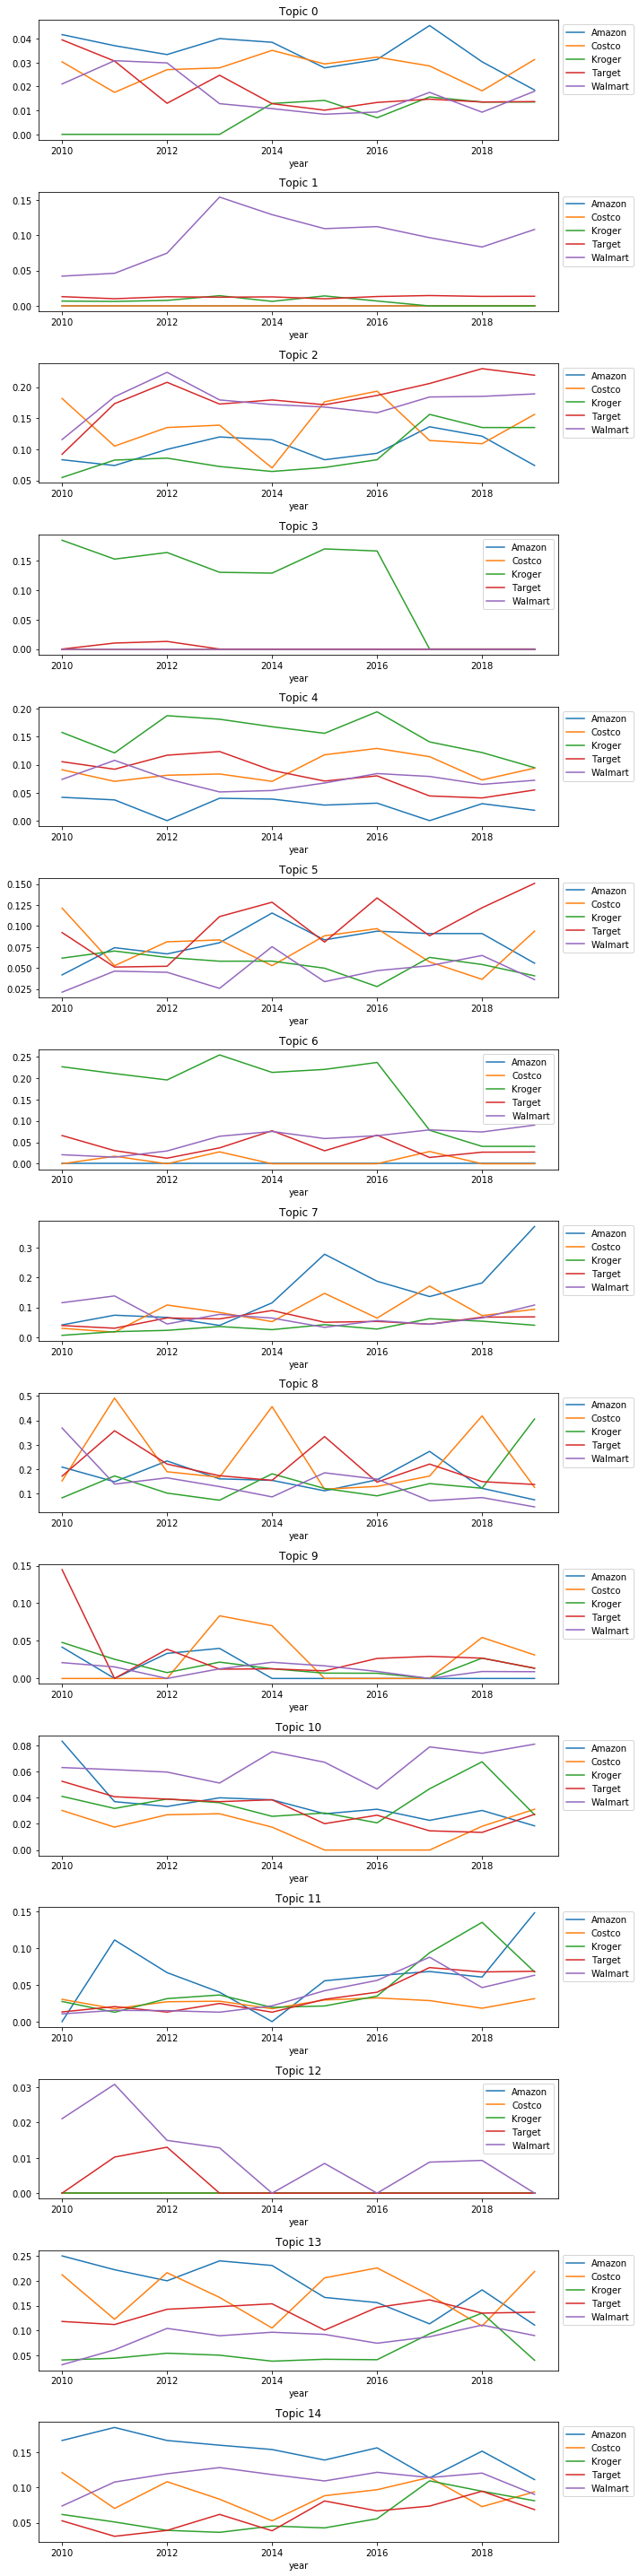

In [14]:
f, a = plt.subplots(15,1,figsize=(10, 40))

df_trend.reset_index().pivot('year','company','topic_0').plot(ax=a[0], title='Topic 0').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_1').plot(ax=a[1], title='Topic 1').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_2').plot(ax=a[2], title='Topic 2').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_3').plot(ax=a[3], title='Topic 3').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_4').plot(ax=a[4], title='Topic 4').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_5').plot(ax=a[5], title='Topic 5').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_6').plot(ax=a[6], title='Topic 6').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_7').plot(ax=a[7], title='Topic 7').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_8').plot(ax=a[8], title='Topic 8').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_9').plot(ax=a[9], title='Topic 9').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_10').plot(ax=a[10], title='Topic 10').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_11').plot(ax=a[11], title='Topic 11').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_12').plot(ax=a[12], title='Topic 12').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_13').plot(ax=a[13], title='Topic 13').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_14').plot(ax=a[14], title='Topic 14').legend(bbox_to_anchor=(1, 1))

f.tight_layout()